# Object density
In this notebook we are going to compare the runs with different amounts of objects to see what the influence is of the density of objects on the network connectivity of the sedentary organisms.

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean
from matplotlib.colors import Normalize, ListedColormap
from matplotlib.lines import Line2D

my_cmap = ListedColormap(['dodgerblue','g','purple','darkorange','red','purple'])

As a reference simulation, we choose the runs with wave+parabolic flow and beaching scheme 2

In [28]:
%matplotlib qt
foldername0 = '21objects'
foldername1 = '16objects'
foldernames = [foldername0,foldername1]
tstep = '001'
beaching_strategy = '2'
flow = 'parabolic'
fb = 'forward' #variable to determine whether the flowfields are analysed 'forward' or 'backward' in time
d2cmax = 0.05
perarea = True

filename = flow+'.nc'
flowdata0 = xr.open_dataset(foldername0+'/'+filename)
flowdata1 = xr.open_dataset(foldername1+'/'+filename)

dfilename = 'r1-B'+beaching_strategy+'-'+flow+'-'+tstep+'-'+fb+'.nc'

data0 = xr.open_dataset(foldername0+'/pfiles/'+dfilename)
data1 = xr.open_dataset(foldername1+'/pfiles/'+dfilename)

dx  = data0.attrs['dx']
dy = dx

In [29]:
totalobjects = np.arange(22)
objects0 = np.load(foldername0+'/preprocessed/'+'objects.npy')
closestobject0 = np.load(foldername0+'/preprocessed/'+'closestobject.npy')

objects1 = np.load(foldername1+'/preprocessed/'+'objects.npy')
closestobject1 = np.load(foldername1+'/preprocessed/'+'closestobject.npy')

x,y = np.meshgrid(flowdata0['X'],flowdata0['Y'])
# xmesh,ymesh = np.meshgrid(np.arange(flowdata['X'].values[0]-0.5*dx, flowdata['X'].values[-1]+0.5*dx, dx),
#                 np.arange(flowdata['Y'].values[0]+0.5*dy, flowdata['Y'].values[-1]-1.5*dy, -dy))
xob,yob = np.meshgrid(np.arange(-0.5, len(totalobjects)+0.5, 1),
                np.arange(-0.5, len(totalobjects)+0.5, 1))
xob1,yob1 = np.meshgrid(np.arange(-0.5, len(objects1)+0.5, 1),
                np.arange(-0.5, len(objects1)+0.5, 1))
labellist = [0, 1, 3, 4, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 19, 21]
notlist = [2,5,8,14,18,20]

Let's look at which objects overlap in both runs and which objects are missing.

In [5]:
%matplotlib qt
fig = plt.figure(figsize=(18,1.5))
ax = plt.axes()
ax.grid(axis='x')

plt.tick_params(      # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    top=False,         # ticks along the top edge are off
    left=False,      # ticks along the left edge are off
    labelleft=False) # labels along the left edge are off

xlocs = np.zeros(len(objects0))
for i in range(len(objects0)):
    xlocs[i] = np.mean(x[objects0[i]])

plt.xticks(xlocs,np.arange(0,len(objects0),1),fontsize=16)
for i in range(len(objects0)):
    ax.scatter(x[objects0[i]],y[objects0[i]],s=10,c=['r'])
for i in range(len(objects1)):
    ax.scatter(x[objects1[i]],y[objects1[i]],s=10,c=['k'])
#     ax.text(np.mean(x[objects[i]]),np.mean(y[objects[i]])-0.05,str(i),horizontalalignment='center', verticalalignment='center',weight='bold')

custom_lines = [Line2D([0], [0], color='r', lw=4)]
ax.legend(custom_lines, ['Taken out'],loc='upper left',fontsize=14)
fig.subplots_adjust(bottom=0.2)

# plt.savefig('Figures/objectnumberscomp')

In [4]:
conmatrix0 = np.zeros((2,len(objects0),len(objects0)))
noselfmatrix0 = np.zeros((2,len(objects0),len(objects0)))

if perarea:
    conmatrix0[0] = np.load(foldername0+'/postprocessed/conmatrix-Single-Perarea-'+beaching_strategy+'-'+flow+'-'+tstep+'-'+str(d2cmax)+'.npy')
    noselfmatrix0[0] = conmatrix0[0]
    np.fill_diagonal(noselfmatrix0[0],0)
    conmatrix0[1] = np.load(foldername1+'/postprocessed/conmatrix-Single-Sparse-Perarea-'+beaching_strategy+'-'+flow+'-'+tstep+'-'+str(d2cmax)+'.npy')
    noselfmatrix0[1] = conmatrix0[1]
    np.fill_diagonal(noselfmatrix0[1],0)
else:
    conmatrix0[0] = np.load(foldername0+'/postprocessed/conmatrix-Single-'+beaching_strategy+'-'+flow+'-'+tstep+'-'+str(d2cmax)+'.npy')
    noselfmatrix0[0] = conmatrix0[0]
    np.fill_diagonal(noselfmatrix0[0],0)
    conmatrix0[1] = np.load(foldername1+'/postprocessed/conmatrix-Single-Sparse-'+beaching_strategy+'-'+flow+'-'+tstep+'-'+str(d2cmax)+'.npy')
    noselfmatrix0[1] = conmatrix0[1]
    np.fill_diagonal(noselfmatrix0[1],0)

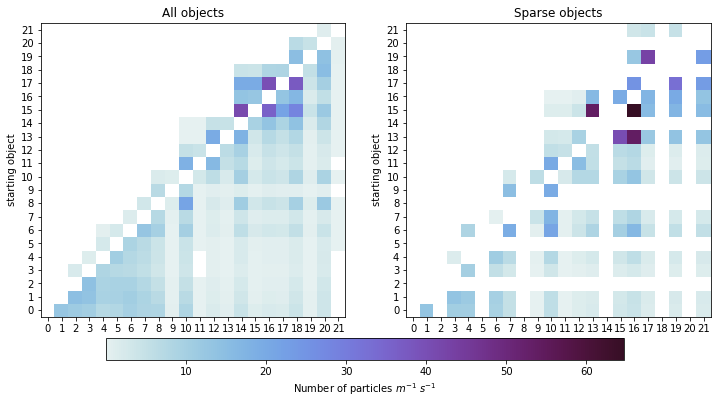

In [78]:
%matplotlib inline
colors = plt.get_cmap('cmo.dense')
cNorm = Normalize(vmin=0.001, vmax=np.max(conmatrix0))
colors.set_under('w')

fig,ax = plt.subplots(1,2,figsize=(12,6))

pc = ax[0].pcolormesh(xob,yob,noselfmatrix0[0],norm=cNorm,cmap = colors)
ax[0].set_title('All objects')
ax[0].set_xticks(np.arange(0,len(totalobjects),1))
ax[0].set_yticks(np.arange(0,len(totalobjects),1))
ax[0].set_xlabel("ending object")
ax[0].set_ylabel("starting object")

pc = ax[1].pcolormesh(xob,yob,noselfmatrix0[1],norm=cNorm,cmap = colors)
ax[1].set_title('Sparse objects')
ax[1].set_xticks(np.arange(0,len(totalobjects),1))
ax[1].set_yticks(np.arange(0,len(totalobjects),1))
ax[1].set_xlabel("ending object")
ax[1].set_ylabel("starting object")

fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.2, 0.1, 0.6, 0.05])
if perarea:
    cbar = fig.colorbar(pc,orientation='horizontal',label='Number of particles $m^{-1}$ $s^{-1}$', cax=cbar_ax)
else:
    cbar = fig.colorbar(pc,orientation='horizontal',label='Number of particles $s^{-1}$', cax=cbar_ax)
plt.savefig('Figures/sparsecomp')

In [43]:
diff = noselfmatrix0[1]-noselfmatrix0[0]

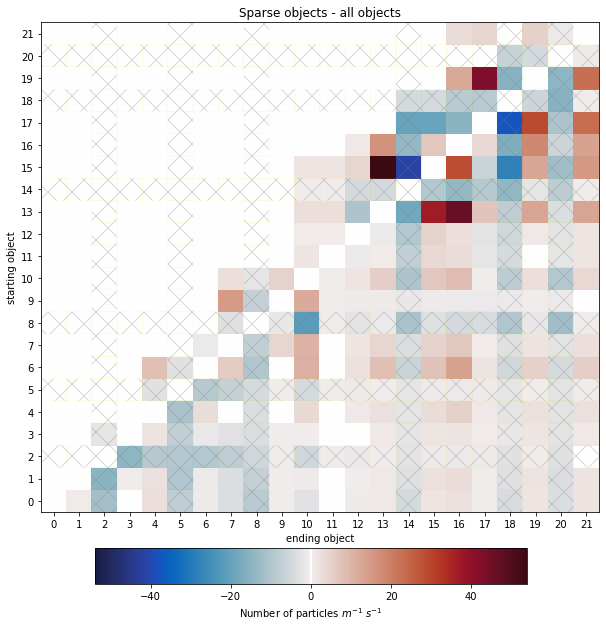

In [71]:
%matplotlib inline
hatch = True
colors = plt.get_cmap('cmo.balance')
cNorm = Normalize(vmin=-np.max([np.abs(np.min(diff)),np.max(diff)]), vmax=np.max([np.abs(np.min(diff)),np.max(diff)]))

newcolors = colors(np.linspace(0, 1, 500))
white = np.array([255/256, 255/256, 255/256, 1])
newcolors[250:252, :] = white
newcmp = ListedColormap(newcolors)

fig = plt.figure(figsize=(10,10))
ax = plt.axes()

pc = ax.pcolormesh(xob,yob,diff,norm=cNorm,cmap = newcmp)
if hatch:
    hatched = np.ones(diff.shape)
    hatched[notlist] = 0
    hatched[:,notlist] = 0
    diffhatched = np.ma.array(diff,mask=hatched)
    hatch = ax.pcolor(xob,yob,diffhatched,facecolor="none",hatch='X',alpha=0.3,edgecolor='grey')
ax.set_title('Sparse objects - all objects')
ax.set_xticks(np.arange(0,len(totalobjects),1))
ax.set_yticks(np.arange(0,len(totalobjects),1))
ax.set_xlabel("ending object")
ax.set_ylabel("starting object")

fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.2, 0.1, 0.6, 0.05])
if perarea:
    cbar = fig.colorbar(pc,orientation='horizontal',label='Number of particles $m^{-1}$ $s^{-1}$', cax=cbar_ax)
else:
    cbar = fig.colorbar(pc,orientation='horizontal',label='Number of particles $s^{-1}$', cax=cbar_ax)
if hatch:
    plt.savefig('Figures/Sparsehatcheddiff')
else:
    plt.savefig('Figures/Sparsediff')

In [30]:
conmatrix1 = np.zeros((2,len(objects1),len(objects1)))
noselfmatrix1 = np.zeros((2,len(objects1),len(objects1)))

if perarea:
    conmatrix1[0] = np.load(foldername0+'/postprocessed/conmatrix-Single-Partial-Perarea-'+beaching_strategy+'-'+flow+'-'+tstep+'-'+str(d2cmax)+'.npy')
    noselfmatrix1[0] = conmatrix1[0]
    np.fill_diagonal(noselfmatrix1[0],0)
    conmatrix1[1] = np.load(foldername1+'/postprocessed/conmatrix-Single-Perarea-'+beaching_strategy+'-'+flow+'-'+tstep+'-'+str(d2cmax)+'.npy')
    noselfmatrix1[1] = conmatrix1[1]
    np.fill_diagonal(noselfmatrix1[1],0)
else:
    conmatrix1[0] = np.load(foldername0+'/postprocessed/conmatrix-Single-Partial-'+beaching_strategy+'-'+flow+'-'+tstep+'-'+str(d2cmax)+'.npy')
    noselfmatrix1[0] = conmatrix1[0]
    np.fill_diagonal(noselfmatrix1[0],0)
    conmatrix1[1] = np.load(foldername1+'/postprocessed/conmatrix-Single-'+beaching_strategy+'-'+flow+'-'+tstep+'-'+str(d2cmax)+'.npy')
    noselfmatrix1[1] = conmatrix1[1]
    np.fill_diagonal(noselfmatrix1[1],0)

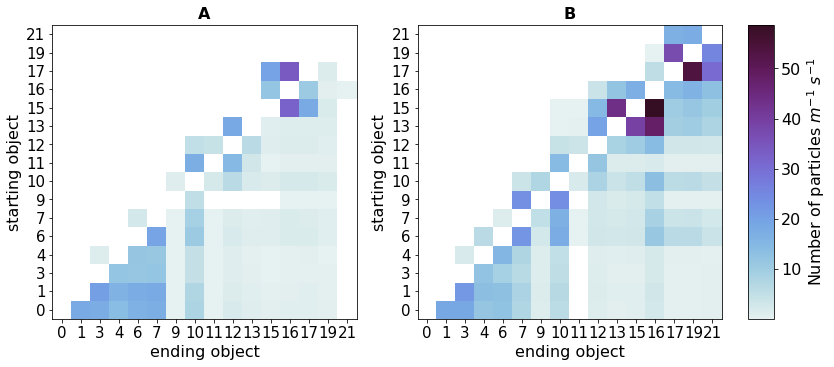

In [32]:
%matplotlib inline
colors = plt.get_cmap('cmo.dense')
cNorm = Normalize(vmin=0.001, vmax=np.max(noselfmatrix1))
colors.set_under('w')

fig,ax = plt.subplots(1,2,figsize=(12,6))

pc = ax[0].pcolormesh(xob1,yob1,noselfmatrix1[0],norm=cNorm,cmap = colors)
ax[0].set_title('A',fontweight="bold",fontsize = 16)
ax[0].set_xticks(np.arange(0,len(objects1),1))
ax[0].set_yticks(np.arange(0,len(objects1),1))
ax[0].set_xticklabels(labellist,fontsize = 15)
ax[0].set_yticklabels(labellist,fontsize = 15)
ax[0].set_xlabel("ending object",fontsize = 16)
ax[0].set_ylabel("starting object",fontsize = 16)

pc = ax[1].pcolormesh(xob1,yob1,noselfmatrix1[1],norm=cNorm,cmap = colors)
ax[1].set_title('B',fontweight="bold",fontsize = 16)
ax[1].set_xticks(np.arange(0,len(objects1),1))
ax[1].set_yticks(np.arange(0,len(objects1),1))
ax[1].set_xticklabels(labellist,fontsize = 15)
ax[1].set_yticklabels(labellist,fontsize = 15)
ax[1].set_xlabel("ending object",fontsize = 16)
ax[1].set_ylabel("starting object",fontsize = 16)

fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.93, 0.2, 0.03, 0.68])
if perarea:
    cbar = fig.colorbar(pc,cax=cbar_ax)
    cbar.set_label('Number of particles $m^{-1}$ $s^{-1}$',size=16)
else:
    cbar = fig.colorbar(pc,cax=cbar_ax)
    cbar.set_label('Number of particles $s^{-1}$',size=16)
cbar.ax.tick_params(labelsize=16) 
plt.savefig('Figures/densecomp-'+flow+'-'+beaching_strategy)

In [80]:
diff = noselfmatrix1[1] - noselfmatrix1[0]
Sparsesum = np.sum(noselfmatrix1[1])
Densesum = np.sum(noselfmatrix0[0])
meandiff = np.mean(diff)

print(Sparsesum)
print(Densesum)
print(meandiff)

1147.063035138427
1321.6570574303748
2.418069310738901


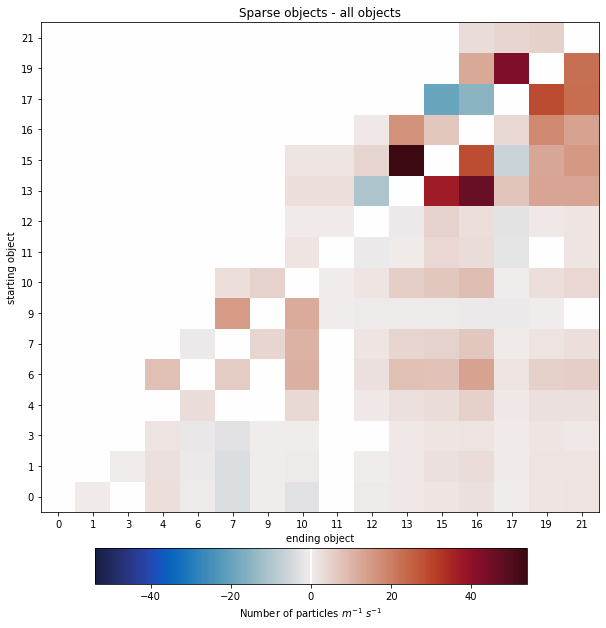

In [23]:
%matplotlib inline
colors = plt.get_cmap('cmo.balance')
cNorm = Normalize(vmin=-np.max([np.abs(np.min(diff)),np.max(diff)]), vmax=np.max([np.abs(np.min(diff)),np.max(diff)]))

newcolors = colors(np.linspace(0, 1, 500))
white = np.array([255/256, 255/256, 255/256, 1])
newcolors[250:252, :] = white
newcmp = ListedColormap(newcolors)

fig = plt.figure(figsize=(10,10))
ax = plt.axes()

pc = ax.pcolormesh(xob1,yob1,diff,norm=cNorm,cmap = newcmp)
ax.set_title('Sparse objects - all objects')
ax.set_xticks(np.arange(0,len(objects1),1))
ax.set_yticks(np.arange(0,len(objects1),1))
ax.set_xticklabels(labellist)
ax.set_yticklabels(labellist)
ax.set_xlabel("ending object")
ax.set_ylabel("starting object")

fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.2, 0.1, 0.6, 0.05])
if perarea:
    cbar = fig.colorbar(pc,orientation='horizontal',label='Number of particles $m^{-1}$ $s^{-1}$', cax=cbar_ax)
else:
    cbar = fig.colorbar(pc,orientation='horizontal',label='Number of particles $s^{-1}$', cax=cbar_ax)
plt.savefig('Figures/Densediff')

In [81]:
Frobenius = np.sqrt(np.sum(np.square(np.absolute(diff))))

In [82]:
Frobenius

123.98937905352771

Indegree

In [10]:
noselfmatrix0.shape

(2, 22, 22)

In [11]:
indegree = np.zeros((2,len(noselfmatrix0[0])))
indegree[0] = np.sum(noselfmatrix0[0],axis=0)
indegree[1,labellist] = np.sum(noselfmatrix1[1],axis=0)

In [12]:
fig = plt.figure(figsize=(18,9))

heights = [3, 1]
spec = fig.add_gridspec(ncols=1, nrows=2, height_ratios=heights,hspace=0.25)

ax0 = fig.add_subplot(spec[0])

xlocs0 = np.zeros(len(objects0))
for i in range(len(objects0)):
    xlocs0[i] = np.mean(x[objects0[i]])
    
xlocs1 = np.zeros(len(objects1))
for i in range(len(objects1)):
    xlocs1[i] = np.mean(x[objects1[i]])

ax0.bar(xlocs0,indegree[0],width=0.15,label=foldernames[0],color=my_cmap(0))
ax0.bar(xlocs1+0.05,indegree[1,labellist],width=0.15,label=foldernames[1],color=my_cmap(1))
ax0.set_axisbelow(True)
ax0.grid()

ax0.set_xticks(xlocs0)
ax0.set_xticklabels(np.arange(0,len(totalobjects),1))
ax0.set_xlim(0.3,8.5)
ax0.set_xlabel("ending object",fontsize=18)
if perarea:
    ax0.set_ylabel("In-degree [# of particles $m^{-1}$ $s^{-1}$]",fontsize = 18)
else:
    ax0.set_ylabel("In-degree [# of particles $s^{-1}$]",fontsize = 18)
ax0.legend(fontsize = 18)
ax0.tick_params(labelsize=16)

ax1 = fig.add_subplot(spec[1])
ax1.grid(axis='x')
ax1.set_xlim(0.3,8.5)

ax1.tick_params(      # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    top=False,         # ticks along the top edge are off
    left=False,      # ticks along the left edge are off
    labelleft=False) # labels along the left edge are off

ax1.set_xticks(xlocs0)
ax1.set_xticklabels(np.arange(0,len(objects0),1),fontsize=16)
for i in range(len(objects0)):
    ax1.scatter(x[objects0[i]],y[objects0[i]],s=10,c=['r'])
for i in range(len(objects1)):
    ax1.scatter(x[objects1[i]],y[objects1[i]],s=10,c=['k'])

custom_lines = [Line2D([0], [0], color='r', lw=4)]
ax1.legend(custom_lines, ['Taken out'],loc='upper left',fontsize=14)
plt.savefig('Figures/Indegree-density')

In [40]:
freshmatrix0 = np.zeros((2,len(objects0)))

if perarea:
    freshmatrix0[0] = np.load(foldername0+'/postprocessed/freshmatrix-Repeat-Perarea-'+beaching_strategy+'-'+flow+'-'+tstep+'-'+str(d2cmax)+'.npy')
    freshmatrix0[1] = np.load(foldername1+'/postprocessed/freshmatrix-Repeat-Sparse-Perarea-'+beaching_strategy+'-'+flow+'-'+tstep+'-'+str(d2cmax)+'.npy')
else:
    freshmatrix0[0] = np.load(foldername0+'/postprocessed/freshmatrix-Repeat-'+beaching_strategy+'-'+flow+'-'+tstep+'-'+str(d2cmax)+'.npy')
    freshmatrix0[1] = np.load(foldername1+'/postprocessed/freshmatrix-Repeat-Sparse-'+beaching_strategy+'-'+flow+'-'+tstep+'-'+str(d2cmax)+'.npy')


In [41]:
%matplotlib qt
fig = plt.figure(figsize=(18,9))

heights = [3, 1]
spec = fig.add_gridspec(ncols=1, nrows=2, height_ratios=heights)

ax0 = fig.add_subplot(spec[0])
ax0.grid()

xlocs = np.zeros(len(objects0))
for i in range(len(objects0)):
    xlocs[i] = np.mean(x[objects0[i]])
    
for i in range(len(freshmatrix0)):
    ax0.plot(xlocs,freshmatrix0[i],label=foldernames[i],c=my_cmap(i),linewidth=3)
ax0.set_xticks(xlocs)
ax0.set_xticklabels(np.arange(0,len(objects0),1))
ax0.set_xlim(0.5,8.5)
ax0.set_xlabel("ending object",fontsize=18)
ax0.set_ylabel("# of 'fresh' particles $s^{-1}$",fontsize = 18)
ax0.legend(fontsize = 18)
ax0.tick_params(labelsize=16)

ax1 = fig.add_subplot(spec[1])
ax1.grid(axis='x')
ax1.set_xlim(0.5,8.5)

ax1.tick_params(      # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    top=False,         # ticks along the top edge are off
    left=False,      # ticks along the left edge are off
    bottom=False,
    labelbottom=False,
    labelleft=False) # labels along the left edge are off

ax1.set_xticks(xlocs)

for i in range(len(objects0)):
    ax1.scatter(x[objects0[i]],y[objects0[i]],s=10,c=['r'])
for i in range(len(objects1)):
    ax1.scatter(x[objects1[i]],y[objects1[i]],s=10,c=['k'])
#     ax.text(np.mean(x[objects[i]]),np.mean(y[objects[i]])-0.05,str(i),horizontalalignment='center', verticalalignment='center',weight='bold')

custom_lines = [Line2D([0], [0], color='r', lw=4)]
ax1.legend(custom_lines, ['Taken out'],loc='upper left',fontsize=14)
plt.savefig('Figures/fresh-sparse-densitycomp')

In [36]:
freshmatrix1 = np.zeros((2,len(objects1)))

freshmatrix1[0] = np.load(foldername0+'/postprocessed/freshmatrix-Repeat-Partial-'+beaching_strategy+'-'+flow+'-'+tstep+'-'+str(d2cmax)+'.npy')
freshmatrix1[1] = np.load(foldername1+'/postprocessed/freshmatrix-Repeat-'+beaching_strategy+'-'+flow+'-'+tstep+'-'+str(d2cmax)+'.npy')

In [39]:
%matplotlib qt
fig = plt.figure(figsize=(18,9))

heights = [3, 1]
spec = fig.add_gridspec(ncols=1, nrows=2, height_ratios=heights)

ax0 = fig.add_subplot(spec[0])
ax0.grid()

xlocs = np.zeros(len(objects1))
for i in range(len(objects1)):
    xlocs[i] = np.mean(x[objects1[i]])
    
for i in range(len(freshmatrix1)):
    ax0.plot(xlocs,freshmatrix1[i],label=foldernames[i],c=my_cmap(i),linewidth=3)
ax0.set_xticks(xlocs)
ax0.set_xticklabels(labellist)
ax0.set_xlim(0.5,8.5)
ax0.set_xlabel("ending object",fontsize=18)
if perarea:
    ax0.set_ylabel("# of 'fresh' particles $m^{-1}$ $s^{-1}$",fontsize = 18)
else:
    ax0.set_ylabel("# of 'fresh' particles $s^{-1}$",fontsize = 18)
ax0.legend(fontsize = 18)
ax0.tick_params(labelsize=16)

ax1 = fig.add_subplot(spec[1])
ax1.grid(axis='x')
ax1.set_xlim(0.5,8.5)

ax1.tick_params(      # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    top=False,         # ticks along the top edge are off
    left=False,      # ticks along the left edge are off
    bottom=False,
    labelbottom=False,
    labelleft=False) # labels along the left edge are off

ax1.set_xticks(xlocs)

for i in range(len(objects0)):
    ax1.scatter(x[objects0[i]],y[objects0[i]],s=10,c=['r'])
for i in range(len(objects1)):
    ax1.scatter(x[objects1[i]],y[objects1[i]],s=10,c=['k'])
#     ax.text(np.mean(x[objects[i]]),np.mean(y[objects[i]])-0.05,str(i),horizontalalignment='center', verticalalignment='center',weight='bold')

custom_lines = [Line2D([0], [0], color='r', lw=4)]
ax1.legend(custom_lines, ['Taken out'],loc='upper left',fontsize=14)
plt.savefig('Figures/fresh-densitycomp')